# Technical Test for WEconnect 

### Author: Magdalena Grzmiel

In [6]:
# import all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn')
from pandas.api.types import CategoricalDtype

## Load the data

In [7]:
# get the header names for the data frames as defined in the src file
flights_header_names = ['fid', 'month_id', 'day_of_month', 'day_of_week_id', 'carrier_id', 'flight_num',
                        'origin_city', 'origin_state', 'dest_city', 'dest_state', 'departure_delay',
                        'taxi_out', 'arrival_delay', 'canceled', 'actual_time', 'distance', 'capacity', 'price']

carriers_header_names = ['cid', 'name']

weekdays_header_names = ['did', 'day_of_week']

# read the data from csv files
df_flights = pd.read_csv('/Users/magdalena.grzmiel/Desktop/flight-dataset/flights-small.csv', sep=',', header=None, 
                         names=flights_header_names) 
df_carriers = pd.read_csv('/Users/magdalena.grzmiel/Desktop/flight-dataset/carriers.csv', sep=',', header=None, 
                         names=carriers_header_names) 
df_weekdays = pd.read_csv('/Users/magdalena.grzmiel/Desktop/flight-dataset/weekdays.csv', sep=',', header=None, 
                         names=weekdays_header_names) 

## Examine the data

In [8]:
df_flights.head(2)

,fid,month_id,day_of_month,day_of_week_id,carrier_id,flight_num,origin_city,origin_state,dest_city,dest_state,departure_delay,taxi_out,arrival_delay,canceled,actual_time,distance,capacity,price
0,1,7,1,5,AA,1,New York NY,New York,Los Angeles CA,California,-4,29,9,0,360,2475,10,480
1,2,7,2,6,AA,1,New York NY,New York,Los Angeles CA,California,-7,13,-10,0,344,2475,11,817


In [11]:
# get the data types for each variable in the data frame 
pd.DataFrame(data={'column name': df_flights.columns, 'dtype': df_flights.dtypes.values})

,column name,dtype
0,fid,int64
1,month_id,int64
2,day_of_month,int64
3,day_of_week_id,int64
4,carrier_id,object
5,flight_num,int64
6,origin_city,object
7,origin_state,object
8,dest_city,object
9,dest_state,object


In [12]:
# check if tehre are any nulls
df_flights.isnull().sum()

fid                0
month_id           0
day_of_month       0
day_of_week_id     0
carrier_id         0
flight_num         0
origin_city        0
origin_state       0
dest_city          0
dest_state         0
departure_delay    0
taxi_out           0
arrival_delay      0
canceled           0
actual_time        0
distance           0
capacity           0
price              0
dtype: int64

In [13]:
# get the shape of the data frame
df_flights.shape

(1148675, 18)

In [14]:
# display the carriers data
df_carriers.head(2)

,cid,name
0,02Q,Titan Airways
1,04Q,Tradewind Aviation


In [15]:
# display the weekdays data
df_weekdays.head(2)

,did,day_of_week
0,1,Monday
1,2,Tuesday


In [16]:
# Join all 3 data frames into one dataframe
df = df_flights.merge(df_carriers, left_on='carrier_id', right_on='cid', how='left')
df = df.merge(df_weekdays, left_on='day_of_week_id', right_on='did', how='left')

# rename the column names
df.rename(columns={'name': 'carrier_name'}, inplace=True) 
# remove the duplicate columns
df.drop(columns=['did', 'cid'], inplace = True)

In [17]:
# get the shape of the data frame
df.shape

(1148675, 20)

## Maximum price of tickets between Seattle, WA and New York, NY 

**Probelm:**

Find the maximum price of tickets between Seattle and New York, NY for each carrier. 

In [18]:
# Extract only the flights between Seattle, WA and New York, NY 
# and exclude the canceled flights:
flights_sea_ny = df[(((df['origin_city']=='Seattle WA') & (df['dest_city']=='New York NY')) |
                     ((df['origin_city']=='New York NY') & (df['dest_city']=='Seattle WA')) & 
                      (df['canceled']==0))]

# get the max ticket price per carrier
max_price_per_carrier = flights_sea_ny.groupby('carrier_name', 
                                                as_index=False)['price'].max().sort_values(by=['price'],
                                                ascending=False).rename(columns={'price': 'max_price'})

# reset index
max_price_per_carrier.reset_index(drop=True, inplace=True)
# display the results
max_price_per_carrier 

,carrier_name,max_price
0,Delta Air Lines Inc.,999
1,JetBlue Airways,996
2,American Airlines Inc.,991


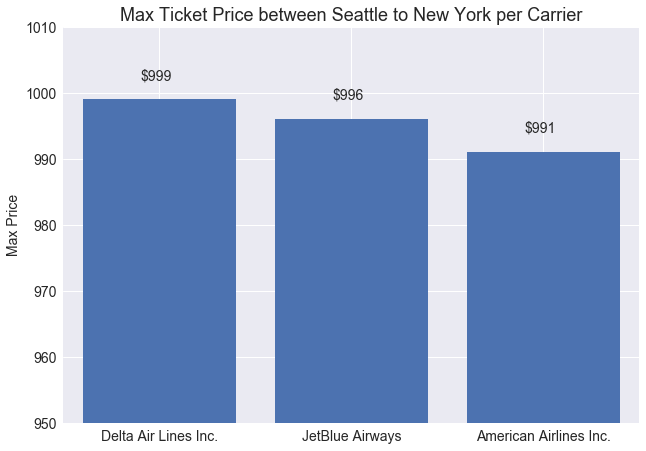

In [39]:
# visualize the data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(max_price_per_carrier.carrier_name, max_price_per_carrier.max_price)
for i, row in max_price_per_carrier.iterrows():
    v = int(row['max_price'])
    ax.text(i - 0.1, v + 3, '$' + str(v), fontsize=14)
ax.set_ylabel('Max Price', fontsize=14)
ax.set_title('Max Ticket Price between Seattle to New York per Carrier', fontsize=18)
plt.axis([-0.5, 2.5, 950, 1010])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Average cost of a ticket by day of the week for direct flights from Seattle, WA to Boston, MA by Alaska Airlines Inc.

**Problem:**

For all the direct flights from Seattle to Boston by Alaska Airlines Inc.,
visualize the average cost of a ticket by day of the week.

In [20]:
# Get the average price of the ticket per week day
avg_price_per_weekday = df[((df['origin_city']=='Seattle WA') 
                          & (df['dest_city']=='Boston MA')
                          & (df['carrier_name']=='Alaska Airlines Inc.') 
                          & (df['canceled']==0))].groupby(['day_of_week'], 
                                as_index=False)['price'].mean().rename(columns={'price': 'avg_price'})

In [21]:
# display the data
avg_price_per_weekday

,day_of_week,avg_price
0,Friday,536.80
1,Monday,519.20
2,Saturday,725.16
3,Sunday,563.08
4,Thursday,524.95
5,Tuesday,544.50
6,Wednesday,538.55


In [22]:
# sort the data by the day of the week
avg_price_per_weekday.day_of_week = pd.Categorical(
    avg_price_per_weekday.day_of_week, 
    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    ordered=True)

avg_price_per_weekday=avg_price_per_weekday.sort_values(by=['day_of_week'])
avg_price_per_weekday.reset_index(drop=True, inplace=True)
avg_price_per_weekday

,day_of_week,avg_price
0,Sunday,563.08
1,Monday,519.20
2,Tuesday,544.50
3,Wednesday,538.55
4,Thursday,524.95
5,Friday,536.80
6,Saturday,725.16


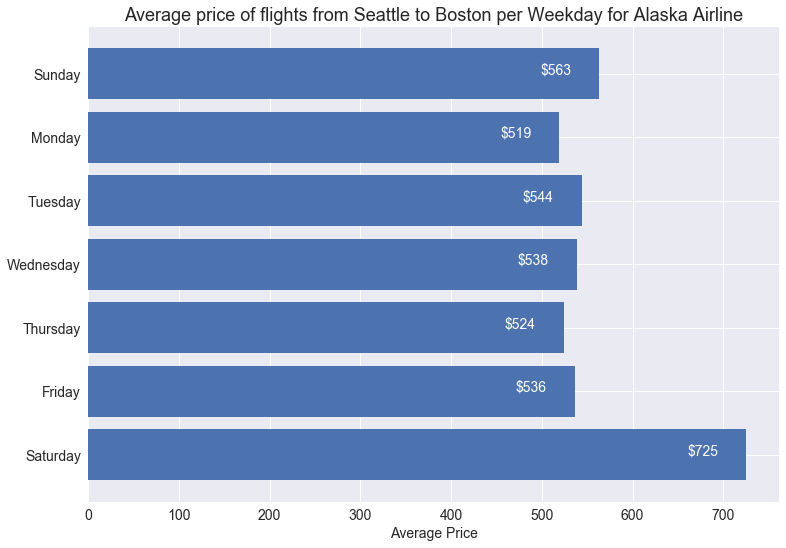

In [38]:
# visualize the data
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
ax.barh(avg_price_per_weekday.day_of_week, avg_price_per_weekday.avg_price)
ax.invert_yaxis()
for i, row in avg_price_per_weekday.iterrows():
    v = int(row['avg_price'])
    ax.text(v - 65, i , '$' + str(v), color='white', fontsize=14)
ax.set_xlabel('Average Price', fontsize=14)
ax.set_title('Average price of flights from Seattle to Boston per Weekday for Alaska Airline', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Traveling as far as possible in the least amount of time from Seattle 

**Problem:**
Which flights would you recommend to travel as far as possible in the least amount of time from Seattle?


In order to recommend a flight which will allow us to travel as far as possible in the least amount of time we need to consider the relationship between two variables: the distance and the flight duration in minutes.

The provided data set does not contain information about the expected time for each flight; however it does provide the actual time which can be used to answer this question.

First, let subset only the relevant data for this analysis: all flights from Seattle which were not canceled. Include following columns: fid, flight_num, origin_city, dest_city, distance, carrier_id, actual_time, departure_delay and arrival_delay.


In [24]:
df_sea_flights = df[(df['origin_city']=='Seattle WA') 
                  & (df['canceled']==0)][['fid', 'flight_num', 'origin_city', 'dest_city', 'distance', 
                                          'carrier_name', 'actual_time', 'departure_delay', 'arrival_delay']]

Next, using the scatter plot visualize the relationship between the flight duration (actual time in minutes) and distance:

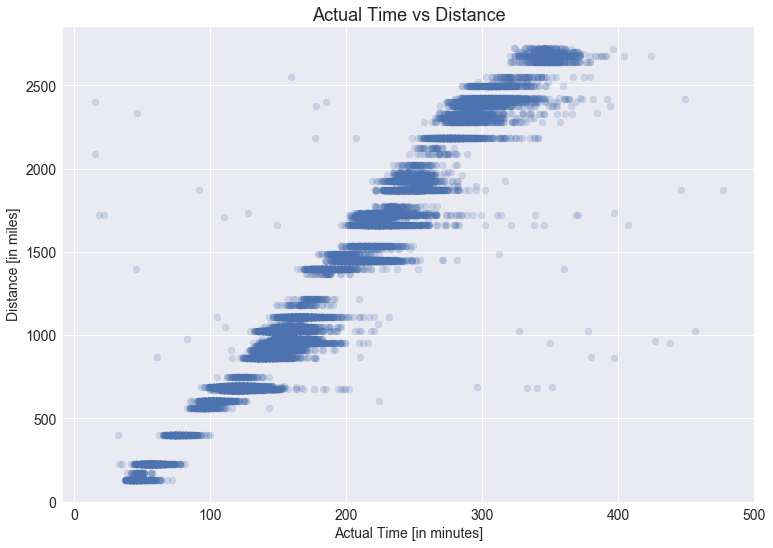

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
ax.scatter(df_sea_flights.actual_time, df_sea_flights.distance, alpha=0.2)
ax.set_xlabel('Actual Time [in minutes]', fontsize=14)
ax.set_ylabel('Distance [in miles]', fontsize=14)
ax.set_title('Actual Time vs Distance', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The chart shows there is a lot of noise in this dataset. There are long flights with many miles conquered in a short period of time and vice versa flights with many miles and long duration. All of those data points are most likely issues in how the data was collected rather than actual data and should not be included in our analysis.

Before cleaning the data, let take a closer look at few examples. First, look at few flights which had very long distance and short flight duration:

In [26]:
df_sea_flights[(df_sea_flights['distance']>=1500) & (df_sea_flights['actual_time']<150)]

,fid,flight_num,origin_city,dest_city,distance,carrier_name,actual_time,departure_delay,arrival_delay
60384,60385,22,Seattle WA,Chicago IL,1721,Alaska Airlines Inc.,18,88,18
89556,89557,366,Seattle WA,Houston TX,1874,Continental Air Lines Inc.,92,-7,374
104817,104818,1580,Seattle WA,Newark NJ,2401,Continental Air Lines Inc.,15,10,59
490649,490650,942,Seattle WA,Chicago IL,1721,United Air Lines Inc.,22,143,33
706172,706173,788,Seattle WA,New Orleans LA,2086,Alaska Airlines Inc.,15,0,354
718260,718261,662,Seattle WA,Dallas/Fort Worth TX,1660,Alaska Airlines Inc.,149,48,393
1034747,1034748,392,Seattle WA,St. Louis MO,1709,Southwest Airlines Co.,110,1,451
1094625,1094626,4575,Seattle WA,Chicago IL,1733,Southwest Airlines Co.,128,18,385
1143359,1143360,2615,Seattle WA,Baltimore MD,2335,Southwest Airlines Co.,46,-1,81


Next let take a look at the flights with long duration and very small distance:

In [27]:
df_sea_flights[(df_sea_flights['distance']<=1500) & (df_sea_flights['actual_time']>300)]

,fid,flight_num,origin_city,dest_city,distance,carrier_name,actual_time,departure_delay,arrival_delay
65455,65456,179,Seattle WA,Ketchikan AK,680,Alaska Airlines Inc.,333,17,242
65478,65479,179,Seattle WA,Ketchikan AK,680,Alaska Airlines Inc.,340,0,388
67249,67250,338,Seattle WA,Long Beach CA,965,Alaska Airlines Inc.,427,21,435
72793,72794,662,Seattle WA,Las Vegas NV,866,Alaska Airlines Inc.,397,-2,397
488901,488902,876,Seattle WA,Denver CO,1024,United Air Lines Inc.,378,-3,251
712444,712445,448,Seattle WA,Los Angeles CA,954,Alaska Airlines Inc.,350,58,249
718318,718319,752,Seattle WA,Kansas City MO,1489,Alaska Airlines Inc.,312,2,103
765924,765925,395,Seattle WA,Salt Lake City UT,689,Delta Air Lines Inc.,351,-5,125
773145,773146,2547,Seattle WA,Minneapolis MN,1399,Delta Air Lines Inc.,360,0,345
1010986,1010987,1526,Seattle WA,Denver CO,1024,United Air Lines Inc.,456,15,406


All of the cases presented above are not valid and should exclude from this analysis. Since we would like to have the expected time duration (which is not available) we can use the actual time to extrapolate. Using median for each flight number, origin city, dest city, and carrier id will allow us to exclude all outliers and get the closest possible flight duration to actual planned one.   

In [28]:
median_flight_duration=df_sea_flights.groupby(['flight_num','carrier_name', 'origin_city', 'dest_city', 
                                               'distance'], as_index=False)['actual_time'].median()

Take another look at the data:

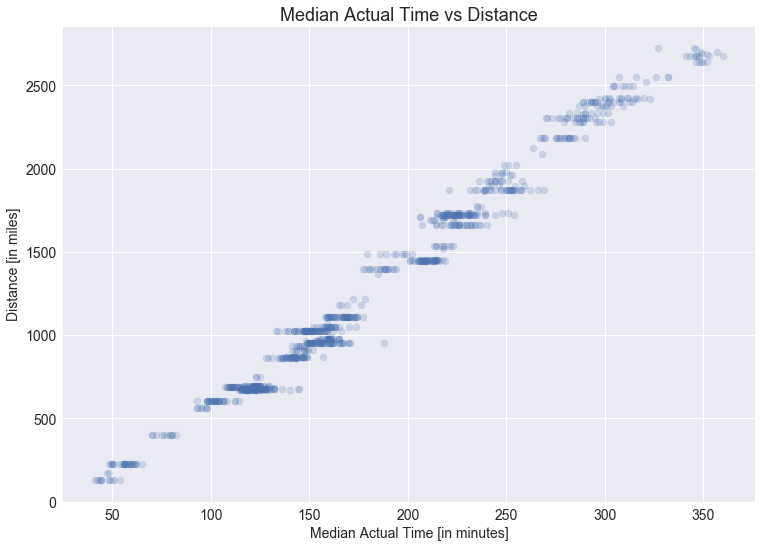

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
ax.scatter(median_flight_duration.actual_time, median_flight_duration.distance, alpha=0.2)
ax.set_xlabel('Median Actual Time [in minutes]', fontsize=14)
ax.set_ylabel('Distance [in miles]', fontsize=14)
ax.set_title('Median Actual Time vs Distance', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


Now the data looks much better. There is a clear correlation between the distance and flight duration, which is expected, longer flights take more time. 
To address the problem of recommending flight to fly as far as possible in least time from Seattle, we can look at this problem from 3 different solutions:
1. Find the furthest destination which can be reached in shortest time
2. Find the shortest destination which can be reached in shortest time 
3. Combine the two solutions above and find a flight which has the best ratio of flight duration to distance

In [30]:
median_flight_duration.sort_values(by=['distance', 'actual_time'], ascending=[False, True]).head(3)

,flight_num,carrier_name,origin_city,dest_city,distance,actual_time
14,16,Alaska Airlines Inc.,Seattle WA,Miami FL,2724,327.0
582,1070,American Airlines Inc.,Seattle WA,Miami FL,2724,345.0
34,38,Alaska Airlines Inc.,Seattle WA,Fort Lauderdale FL,2717,346.0


The furthest destination which can be reached from Seattle in shortest period of time is flight 16 offered by Alaska 
Airlines Inc to Miami.

In [31]:
median_flight_duration.sort_values(by=['distance','actual_time'], ascending=[True, True]).head(3)

,flight_num,carrier_name,origin_city,dest_city,distance,actual_time
944,6344,SkyWest Airlines Inc.,Seattle WA,Portland OR,129,41.0
945,6346,SkyWest Airlines Inc.,Seattle WA,Portland OR,129,42.0
942,6341,SkyWest Airlines Inc.,Seattle WA,Portland OR,129,43.0


The shortest flight from Seattle is the one offered by SkyWest Airlines Inc., flight 6344 to Portland.

Now, let explore the 3rd solution, which looks at the ratio of flight duration to distance:

In [32]:
# get the ratio of time (flight duration) to distance
median_flight_duration['duration_to_distance'] = median_flight_duration['actual_time']/median_flight_duration['distance']
# get the first 5 flights with smallest ratio
median_flight_duration.sort_values(by='duration_to_distance', ascending=True).head(5)

,flight_num,carrier_name,origin_city,dest_city,distance,actual_time,duration_to_distance
658,1454,United Air Lines Inc.,Seattle WA,Washington DC,2306,270.0,0.117086
588,1088,United Air Lines Inc.,Seattle WA,Washington DC,2306,270.5,0.117303
572,1026,Continental Air Lines Inc.,Seattle WA,Houston TX,1874,221.0,0.117930
214,352,United Air Lines Inc.,Seattle WA,Washington DC,2306,273.0,0.118387
392,608,United Air Lines Inc.,Seattle WA,Washington DC,2306,276.0,0.119688


The best ratio of flight duration to distance is for flights from Seattle to Washington DC offered 
by United Air Lines Inc (e.g. flight 1454, 1088). Also, flight from Seattle WA to Houston TX offered by 
Continental Air Lines Inc. has a very similar ratio of time to distance.

Next look how the ratio of duratio to distance looks like when compared to distance.

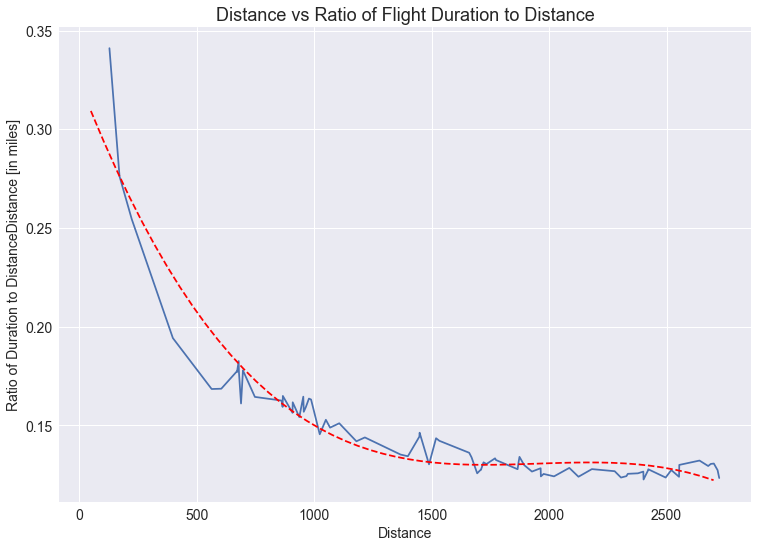

In [35]:
ratio_distance=median_flight_duration.groupby(['distance'], as_index=False)['duration_to_distance'].median()

# to get the trend line
z = np.polyfit(ratio_distance['distance'], ratio_distance['duration_to_distance'], 3)
p = np.poly1d(z)
t = np.linspace(50, 2700)

fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
ax.plot(ratio_distance.distance, ratio_distance.duration_to_distance)
ax.set_xlabel('Distance', fontsize=14)
ax.set_ylabel('Ratio of Duration to DistanceDistance [in miles]', fontsize=14)
ax.set_title('Distance vs Ratio of Flight Duration to Distance', fontsize=18)
plt.plot(t, p(t),'r--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

On the chart above, we see short flights have the worst ratio of flight duration to distance, which is expected since taking off and landing take a lot of time. However, we also see that after roughly 1700 miles to 2000 miles the ratio does not improve a lot so it is worth to consider all destinations which are more than 1700 miles from Seattle.



### Alternative Solution 

Anther possible solutions to this problem would be calculating the expected flight time based on the actual time, 
departure delay and arrival delay for each flight number, origin city, dest city:

`expected_time = (actual time + departure delay - arrivale delay)`

After that we would follow the same logic as we did when using the actual time.